In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil

from PIL import Image

from random import choice, sample
from warnings import filterwarnings
filterwarnings("ignore")

Código para generar un código único en cada imagen del dataset

In [ ]:
carpeta_principal = "D:/Estiven/Datos/Proyectos/olimpiadas_AI/DATASET"

# Lista de carpetas a recorrer
carpetas = os.listdir(carpeta_principal)

contador = 0

# Recorriendo cada carpeta y cada archivo en ellas
for carpeta in carpetas:
    ruta_carpeta = os.path.join(carpeta_principal, carpeta)

    for filename in os.listdir(ruta_carpeta):

        _, file_extension = os.path.splitext(filename) # Obtener la extensión del archivo

        nuevo_nombre = f"{carpeta}_{contador}{file_extension}"  # Nuevo nombre del archivo
        nueva_ruta = os.path.join(ruta_carpeta, nuevo_nombre)

        # Renombrando los archivos
        os.rename(os.path.join(ruta_carpeta, filename), nueva_ruta)
        contador += 1

Código para crear un dataframe con información de cada imagen del dataset

In [ ]:
carpeta_principal = "D:/Estiven/Datos/Proyectos/olimpiadas_AI/DATASET"

# Lista de carpetas a recorrer
carpetas = os.listdir(carpeta_principal)

# Listas donde se contendrán los datos
dimensiones = []
extensiones = []
categoria = []
nombre_archivo = []

# Recorriendo cada archivo de las carpetas
for carpeta in carpetas:
    carpeta_path = os.path.join(carpeta_principal, carpeta)

    for archivo in os.listdir(carpeta_path):
        archivo_path = os.path.join(carpeta_path, archivo)

        # Abriendo cada imagen y sacando su información
        with Image.open(archivo_path) as imagen:
            imagen_size = imagen.size
            extension = imagen.format

        # Guardando los datos en listas
        dimensiones.append(imagen_size)
        extensiones.append(extension)
        categoria.append(carpeta)
        nombre_archivo.append(archivo)

Código para cambiar la extensión de las imágenes .png a .jpg

In [ ]:
carpeta_principal = 'D:/Estiven/Datos/Proyectos/olimpiadas_AI/DATASET'

# Recorriendo todas las carpetas y archivos
for subdir, _, archivos in os.walk(carpeta_principal):
    for archivo in archivos:
        # Comprobando si el archivo es una imagen PNG
        if archivo.lower().endswith('.png'):
            ruta_completa = os.path.join(subdir, archivo)
            imagen_png = Image.open(ruta_completa)

            # Crea la ruta de archivo para la nueva imagen JPG
            nueva_ruta = os.path.splitext(ruta_completa)[0] + '.jpg'

            # Convirtiendo la imagen como JPG
            imagen_png.convert('RGB').save(nueva_ruta, 'JPEG')

            # Eliminar la imagen PNG original
            os.remove(ruta_completa)

Código para sacar una muestra de 10 imágenes de cada categoría

In [ ]:
# Definir las carpetas de origen y destino
carpeta_origen = "D:/Estiven/Datos/Proyectos/olimpiadas_AI/DATASET"
carpeta_destino = "D:/Estiven/Datos/Proyectos/olimpiadas_AI/muestra"

# Crear la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Listar todas las carpetas en la carpeta de origen
subcarpetas = [f.path for f in os.scandir(carpeta_origen) if f.is_dir()]

# Iterar a través de las subcarpetas y seleccionar 10 archivos de cada una
for subcarpeta in subcarpetas:
    archivos = [f.path for f in os.scandir(subcarpeta) if f.is_file()]
    archivos_seleccionados = sample(archivos, 10)  # Seleccionar 10 archivos al azar

    for archivo in archivos_seleccionados:
        # Mover el archivo seleccionado a la carpeta de destino
        shutil.move(archivo, os.path.join(carpeta_destino, os.path.basename(archivo)))
        print(f"Archivo movido: {archivo} a {os.path.join(carpeta_destino, os.path.basename(archivo))}")

Creación de dataframe con información relevante del dataset

In [ ]:
# Creación del dataframe con base en las listas anteriores
dataset_info = pd.DataFrame(zip(nombre_archivo, dimensiones, extensiones, categoria), columns=['nombre_archivo','dimension', 'extension', 'categoria'])

# Descomprimiendo la tupla dada por el método img.size
dataset_info[['ancho', 'alto']] = dataset_info['dimension'].apply(lambda x: pd.Series([x[0], x[1]]))

# Obteniendo el identificador único de cada imagen
# dataset_info['identificador_unico'] = dataset_info['nombre_archivo'].str.extract(r'_(\d+)\.').astype('int')
# dataset_info = dataset_info.drop(columns='dimension') # Eliminando la columna dimension
# dataset_info = dataset_info.sort_values(by='identificador_unico').reset_index(drop=True) # Reordenando el dataframe
dataset_info

,nombre_archivo,dimension,extension,categoria,ancho,alto
0,0.jpg,"(500, 304)",JPEG,birds,500,304
1,1.jpg,"(500, 374)",JPEG,birds,500,374
2,10.jpg,"(500, 333)",JPEG,birds,500,333
3,100.jpg,"(500, 333)",JPEG,birds,500,333
4,1000.jpg,"(469, 298)",JPEG,birds,469,298
...,...,...,...,...,...,...
33143,pixabay_wild_001249.jpg,"(512, 512)",JPEG,wild,512,512
33144,pixabay_wild_001250.jpg,"(512, 512)",JPEG,wild,512,512
33145,pixabay_wild_001251.jpg,"(512, 512)",JPEG,wild,512,512
33146,pixabay_wild_001252.jpg,"(512, 512)",JPEG,wild,512,512


In [ ]:
dataset_info.to_csv('dataset_info_original.csv')

# Análisis a las imágenes originales / transformadas

In [3]:
# Dataset imágenes transformadas
dataset_info_trans = pd.read_csv('D:/Estiven/Datos/Proyectos/SelSegToYolo/image_transformation/dataset_info.csv', index_col='Unnamed: 0')

# Dataset imágenes originales y
dataset_info = pd.read_csv('D:/Estiven/Datos/Proyectos/SelSegToYolo/image_transformation/dataset_info_original.csv', index_col='Unnamed: 0')
dataset_info.nombre_archivo = dataset_info.nombre_archivo.apply(lambda x: x.split('.')[0])

In [4]:
print('Número de imagenes según sus extensiones')
pd.DataFrame(dataset_info_trans.groupby('extension')['identificador_unico'].count())

Número de imagenes según sus extensiones


,identificador_unico
extension,
JPEG,24323
PNG,8825


In [5]:
print('Número de imágenes por categoría')
pd.DataFrame(dataset_info_trans.groupby('categoria')['identificador_unico'].count())

Número de imágenes por categoría


,identificador_unico
categoria,
birds,3788
cat,5653
dog,5239
fish,13230
wild,5238


In [6]:
dataset_info_trans[['ancho', 'alto']].describe()

,ancho,alto
count,33148.000000,33148.000000
mean,531.448836,386.482804
std,61.389807,147.452086
min,140.000000,25.000000
25%,512.000000,230.750000
50%,512.000000,500.000000
75%,567.000000,512.000000
max,650.000000,600.000000


In [7]:
# dataset_info = pd.read_csv('/content/drive/MyDrive/DATASET_02_SEPT/Procesamiento de imágen/dataset_info_original.csv', index_col='Unnamed: 0')
# dataset_info.nombre_archivo = dataset_info.nombre_archivo.apply(lambda x: x.split('.')[0])
dataset_info.head(2)

,nombre_archivo,dimension,extension,categoria,ancho,alto
0,0,"(500, 304)",JPEG,birds,500,304
1,1,"(500, 374)",JPEG,birds,500,374


In [8]:
archivos = dataset_info.nombre_archivo
filtro = archivos.isin(archivos[archivos.duplicated()])
imagenes_repetidas = dataset_info[filtro].reset_index(drop=True)
imagenes_repetidas

,nombre_archivo,dimension,extension,categoria,ancho,alto
0,1,"(500, 374)",JPEG,birds,500,374
1,10,"(500, 333)",JPEG,birds,500,333
2,100,"(500, 333)",JPEG,birds,500,333
3,1000,"(469, 298)",JPEG,birds,469,298
4,1001,"(500, 335)",JPEG,birds,500,335
...,...,...,...,...,...,...
16367,zeus_faber_6,"(598, 287)",PNG,fish,598,287
16368,zeus_faber_7,"(650, 513)",JPEG,fish,650,513
16369,zeus_faber_7,"(565, 233)",PNG,fish,565,233
16370,zeus_faber_8,"(640, 480)",JPEG,fish,640,480


In [9]:
imagenes_repetidas.groupby('extension')['extension'].count()

extension
JPEG    8186
PNG     8186
Name: extension, dtype: int64

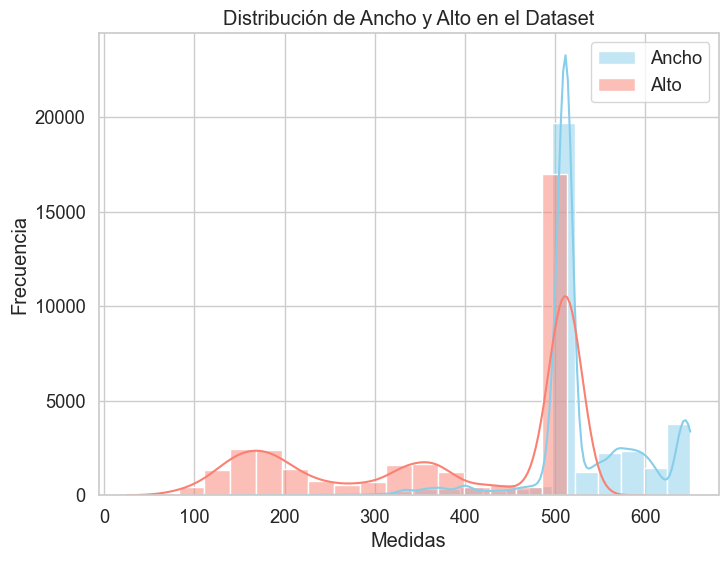

In [10]:
# Configurar el estilo de Seaborn para un gráfico científico
sns.set(style='whitegrid', font_scale=1.2)

# Crear un histograma con dos variables
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset_info, x='ancho', bins=20, kde=True, label='Ancho', color='skyblue')
sns.histplot(data=dataset_info, x='alto', bins=20, kde=True, label='Alto', color='salmon')

plt.xlabel('Medidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ancho y Alto en el Dataset')

plt.legend()
plt.show()

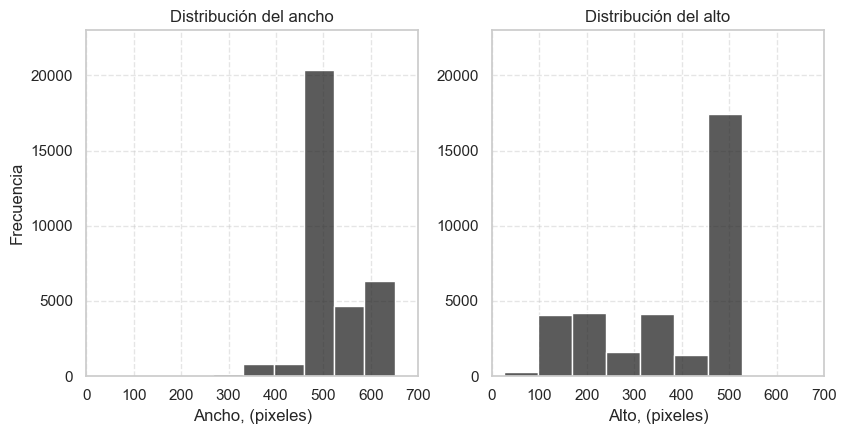

In [13]:
# Configurar el estilo de Seaborn para un gráfico científico
sns.set(style="whitegrid", palette="gray")

# Crear dos subplots en la misma fila
fig, axes = plt.subplots(1, 2, figsize=(8.5, 4.5))

# Histograma para la variable "ancho" con límites iguales
sns.histplot(data=dataset_info, x='ancho', bins=8, ax=axes[0])
axes[0].set_xlabel('Ancho, (pixeles)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del ancho')
axes[0].set_ylim(0, 23000)
axes[0].set_xlim(0, 700)
axes[0].grid(True, linestyle='--', alpha=0.5)


# Histograma para la variable "alto" con límites iguales
sns.histplot(data=dataset_info, x='alto', bins=8, ax=axes[1])
axes[1].set_xlabel('Alto, (pixeles)')
axes[1].set_ylabel('')
axes[1].set_title('Distribución del alto')
axes[1].set_ylim(0, 23000)
axes[1].set_xlim(0, 700)
axes[1].grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# # Guardar el gráfico en alta resolución
# plt.savefig('distribucion_ancho_alto.pdf', dpi=300)
plt.show()